<a href="https://colab.research.google.com/github/Areenhammad/semenar/blob/main/Copy_of_Welcome_To_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('employee_data.csv')

# Basic DataFrame operations
print(df)
print(df.info())
print(df.shape)
print(df.describe())
print(df.head())
print(df.tail())
print(df.duplicated())
print(df.isnull())
print(df.dtypes)

# Exporting DataFrame to a new CSV file
df.to_csv('new_employee_data.csv', index=False)

# Calculating correlation
print(df.corr())

# Handling missing values
df_dropped = df.dropna()  # Dropping rows with missing values
df_filled = df.fillna(df.mean())  # Filling missing values with the mean

# Exporting the cleaned DataFrame
df_filled.to_csv('df_clean_null.csv', index=False)

# Handling duplicates
print(df.duplicated().sum())
df_no_duplicates = df.drop_duplicates()
print(df_no_duplicates.duplicated().sum())

# Correcting data types (uncomment and adjust the following lines if necessary)
# df['Performance_Score'] = pd.to_numeric(df['Performance_Score'], errors='coerce')
# print(df['Performance_Score'])

# Slicing specific columns
print(df.loc[0:9, ['Performance Score', 'Current Employee Rating']])


      EmpID FirstName    LastName  StartDate   ExitDate  \
0      3427     Uriah     Bridges  20-Sep-19        NaN   
1      3428     Paula       Small  11-Feb-23        NaN   
2      3429    Edward        Buck  10-Dec-18        NaN   
3      3430   Michael     Riordan  21-Jun-21        NaN   
4      3431   Jasmine       Onque  29-Jun-19        NaN   
...     ...       ...         ...        ...        ...   
2995   3422    Jakobe    Erickson  22-Jun-22  07-Aug-22   
2996   3423    Adyson  Strickland  28-Dec-20        NaN   
2997   3424   Annabel     Wilkins  09-Dec-20  04-Aug-22   
2998   3425    Kendra       Braun  28-May-19  23-Oct-21   
2999   3426     Chace        Kerr  27-Apr-22        NaN   

                        Title          Supervisor  \
0     Production Technician I        Peter Oneill   
1     Production Technician I     Renee Mccormick   
2          Area Sales Manager      Crystal Walker   
3          Area Sales Manager      Rebekah Wright   
4          Area Sales Mana

<ipython-input-39-91f87d3ef041>:21: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())
<ipython-input-39-91f87d3ef041>:25: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_filled = df.fillna(df.mean())  # Filling missing values with the mean


# New Section

Employee ID                0
Employee Score             0
Current Employee Rating    0
dtype: int64


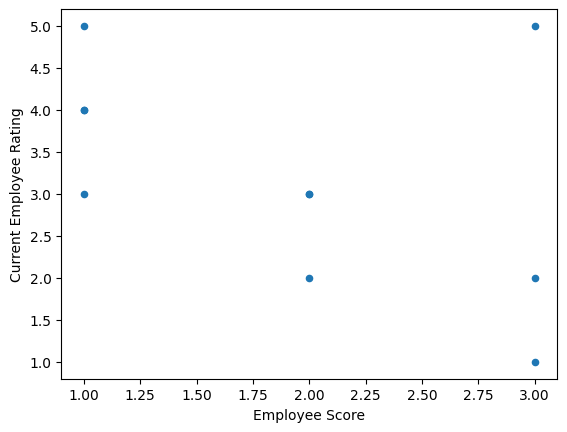

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data for demonstration
data = {
    'Employee ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Employee Score': [1, 2, 1, 3, 2, 1, 3, 2, 1, 3],
    'Current Employee Rating': [3, 2, 5, 1, 3, 4, 5, 3, 4, 2]
}

# Creating a DataFrame from the sample data
df = pd.DataFrame(data)

# Checking for null values in the DataFrame
print(df.isnull().sum())

# Plotting a scatter plot with 'Employee Type' on the x-axis and 'Current Employee Rating' on the y-axis
df.plot(kind='scatter', x='Employee Score', y='Current Employee Rating')
plt.show()


scatter between Employee Rating and Score


Explanation about the all project

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv('employee_data.csv')

# Print the DataFrame
print(df)

# Calculate and print the correlation matrix
print(df.corr())



      EmpID FirstName    LastName  StartDate   ExitDate  \
0      3427     Uriah     Bridges  20-Sep-19        NaN   
1      3428     Paula       Small  11-Feb-23        NaN   
2      3429    Edward        Buck  10-Dec-18        NaN   
3      3430   Michael     Riordan  21-Jun-21        NaN   
4      3431   Jasmine       Onque  29-Jun-19        NaN   
...     ...       ...         ...        ...        ...   
2995   3422    Jakobe    Erickson  22-Jun-22  07-Aug-22   
2996   3423    Adyson  Strickland  28-Dec-20        NaN   
2997   3424   Annabel     Wilkins  09-Dec-20  04-Aug-22   
2998   3425    Kendra       Braun  28-May-19  23-Oct-21   
2999   3426     Chace        Kerr  27-Apr-22        NaN   

                        Title          Supervisor  \
0     Production Technician I        Peter Oneill   
1     Production Technician I     Renee Mccormick   
2          Area Sales Manager      Crystal Walker   
3          Area Sales Manager      Rebekah Wright   
4          Area Sales Mana

<ipython-input-32-71e5a9a68f30>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df.corr())


In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

# Assuming 'Current Employee Rating' is the target variable
y = df['Current Employee Rating']

# Selecting numeric columns for feature selection
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
X = df[numeric_cols].drop('Current Employee Rating', axis=1)

# Handling missing values
X.fillna(X.mean(), inplace=True)

# Feature selection
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' to select all features, replace with desired number
X_new = selector.fit_transform(X, y)

# Get the scores and p-values for each feature
feature_scores = pd.DataFrame({'Feature': X.columns,
                               'Score': selector.scores_,
                               'p_value': selector.pvalues_})

# Sorting by score
feature_scores.sort_values(by='Score', ascending=False, inplace=True)

feature_scores


,Feature,Score,p_value
0,EmpID,158.546327,3.232101e-123
1,LocationCode,0.746231,5.604338e-01


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Score'].plot(kind='hist', bins=20, title='Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['p_value'].plot(kind='hist', bins=20, title='p_value')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Score', y='p_value', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Feature')):
  _plot_series(series, series_name, i)
  fig.legend(title='Feature', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Feature')):
  _plot_series(series, series_name, i)
  fig.legend(title='Feature', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['p_value']
  ys = series['Score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('p_value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Feature')):
  _plot_series(series, series_name, i)
  fig.legend(title='Feature', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p_value')
_ = plt.ylabel('Score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['p_value']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'p_value'}, axis=1)
              .sort_values('p_value', ascending=True))
  xs = counted['p_value']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('p_value', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Feature')):
  _plot_series(series, series_name, i)
  fig.legend(title='Feature', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('p_value')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_10['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Score'].plot(kind='line', figsize=(8, 4), title='Score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['p_value'].plot(kind='line', figsize=(8, 4), title='p_value')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='index', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Score', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='p_value', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)